# OOI Ocean Data Labs - Data Access Template
*Written by Sage Lichtenwalner, Rutgers University, March 8, 2019*

*The template was developed for the [March 2019 OOI Ocean Data Labs Workshop](https://datalab.marine.rutgers.edu/workshops/data-lab-workshop-march-2019/)*

## Introduction
This Python notebook includes the the essential code needed to access, plot and export data from the OOI data portal.  It was designed to be used as a template that can be used to start your own notebooks.

For a more complete tutorial, please see the notebook [Accessing OOI Data - An Ocean Data Labs Introduction](https://github.com/ooi-data-lab/Data-Lab-Workshops/blob/master/Accessing_OOI_Data.ipynb)

In [1]:
# Install the required libraries
import xarray as xr
!pip install netcdf4
import pandas as pd
import matplotlib.pyplot as plt

## Discovering and Request OOI Data

<img src="https://oceanobservatories.org/wp-content/uploads/2015/09/CEV-OOI-Global-Irminger-Sea.jpg" alt="OOI Irminger Sea Array" width="450px" align="right">

In this example, we will use data from the **30m Dissolved Oxygen** sensor on the **[Global Irminger Sea Flanking Mooring A](https://oceanobservatories.org/site/gi03flma/)**, aka **GI03FLMA-RIS01-03-DOSTAD000**.

We made a download request for all "recovered_host" data availble from this instrument from the [OOI Data Portal](https://ooinet.oceanobservatories.org/data_access/?search=GI03FLMA-RIS01-03-DOSTAD000).

## Load the Dataset

In [0]:
url = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140912T201501-20150818T103001.nc'

In [3]:
# Load the data
ds = xr.open_dataset(url)
ds = ds.swap_dims({'obs': 'time'})
print('Dataset has %d points' % ds.time.size)

Dataset has 32602 points


## Export

We can convert our xarray Dataset into a pandas Dataframe to export our dataset to CSV.  

*Note: Don't do this on a big dataset!!!  It will take a long time, and result in a massive file.  If you have a lot of data, try downsampling first.*

In [0]:
# Convert the xarray Dataset to a pandas DataFrame
df = ds.to_dataframe()

In [0]:
# Create a CSV file with the raw dataset
df.to_csv('output.csv') 

In [0]:
# Export the daily averaged data
df.resample('D').mean().to_csv('output_daily.csv')

In [0]:
# If we have a large file, you can compress it using:
# !gzip output.csv

In [8]:
ls -l

total 15976
-rw-r--r-- 1 root root 16248711 Mar  8 19:36 output.csv
-rw-r--r-- 1 root root   103526 Mar  8 19:36 output_daily.csv
drwxr-xr-x 1 root root     4096 Feb 26 17:33 sample_data/


## Plot

And now we can plot some data!

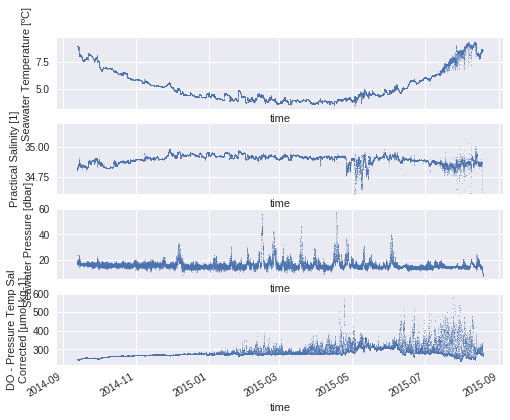

In [9]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize=(8,6))
ds['ctdmo_seawater_temperature'].plot(ax=ax1,linestyle='None',marker='.',markersize=1)
ds['practical_salinity'].plot(ax=ax2,linestyle='None',marker='.',markersize=1)
ds['int_ctd_pressure'].plot(ax=ax3,linestyle='None',marker='.',markersize=1);
ds['dissolved_oxygen'].plot(ax=ax4,linestyle='None',marker='.',markersize=1);

# Let's change the salinity y-limits to account for outliners
ax2.set_ylim(34.6,35.2);

And now let's make a TS plot based on a subset of the data.

In [0]:
# Subset the data
ds2 = ds.loc[dict(time=slice('2014-10-01', '2014-10-31'))]

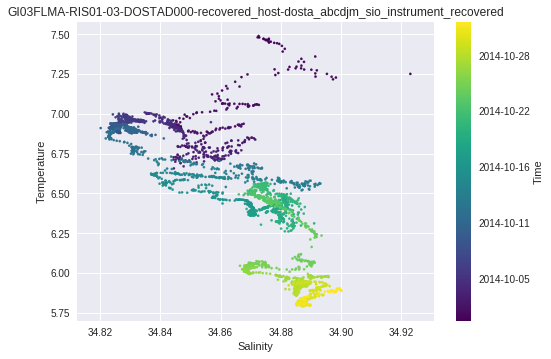

In [11]:
# TS Plot
plt.scatter(ds2.practical_salinity,ds2.ctdmo_seawater_temperature,s=5,c=ds2.time, cmap='viridis')
plt.xlabel('Salinity')
plt.ylabel('Temperature')

# Quick title from the file
plt.title(ds.source); 

# Add a colorbar
cbar = plt.colorbar(label='Time');

# Fix the colorbar ticks
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

## Some Basic Statistics

In [12]:
# Convert to DataFrame
df = ds[['ctdmo_seawater_temperature','practical_salinity','dissolved_oxygen']].to_dataframe()

# Drop unnecessary columns
df = df.drop(columns=['obs','lon','lat']) 

df.head()

,ctdmo_seawater_temperature,practical_salinity,dissolved_oxygen,int_ctd_pressure
time,,,,
2014-09-12 20:15:01,8.9442,34.804008,247.248944,23.462460
2014-09-12 20:30:01,8.9442,34.804008,241.812675,23.462460
2014-09-12 20:45:01,8.9442,34.804008,245.634307,23.462460
2014-09-12 21:00:01,8.9641,34.813397,245.819714,19.198884
2014-09-12 21:15:01,8.9669,34.815390,245.455993,19.163354


In [13]:
# Statistics
df.describe()

,ctdmo_seawater_temperature,practical_salinity,dissolved_oxygen,int_ctd_pressure
count,32602.000000,32602.000000,32602.000000,32602.000000
mean,5.302638,34.896432,288.198456,16.099682
std,1.485534,0.047556,33.311385,3.605048
min,3.411300,33.818704,234.574134,6.913503
25%,4.088225,34.876378,270.581732,14.242476
50%,4.683750,34.904589,276.380116,15.290606
75%,6.159250,34.923763,300.009837,16.782857
max,9.374200,35.035063,581.756776,57.837544
